In [1]:
import csv
import cv2
import fnmatch
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Dense, Flatten
from keras.models import model_from_json, Sequential
from keras.optimizers import Adam
import math
from matplotlib import pyplot
import numpy as np
import os
import scipy
from sklearn.utils import shuffle

Using TensorFlow backend.


In [2]:
CAMERA_COUNT = 3

DRIVING_LOG_PATH = './data'
DRIVING_LOG_FILE = 'driving_log.csv'

CENTER_IMAGE_REGULAR_EXPRESSION = 'center*'
IMAGE_PATH = './data/IMG'

SET_SIZE = 8036

WIDTH = 66
LENGTH = 200
DEPTH = 1

SAMPLES_PER_EPOCH = 2
EPOCH = 4
VALIDATION_SET_SIZE = 2

center_camera_file = 'center_2016_12_01_13_37_16_570.jpg'
left_camera_file = 'left_2016_12_01_13_37_16_570.jpg'
right_camera_file = 'right_2016_12_01_13_37_16_570.jpg'

hard_left_file = 'center_2016_12_01_13_39_28_024.jpg'
hard_right_file = 'center_2016_12_01_13_38_46_752.jpg'

Shape: (66, 320)


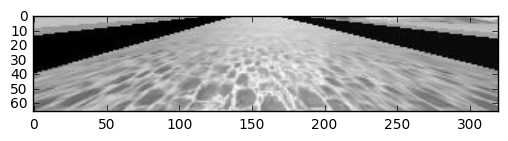

In [23]:
path = '/home/user/Downloads/behavioral-cloning/data/2017-02-16-center-3/IMG/center_2017_02_16_16_53_45_304.jpg'

image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# image = cv2.resize(image, (0, 0), fx = 0.5, fy = 0.5)
image = image[64:130, 0:320]
print('Shape:', image.shape)
pyplot.imshow(image, cmap = 'gray')
# pyplot.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
pyplot.show()